**Name: Dibyanshu Ratna Bajracharya**

**Class: L5CG2**

# 3 To - Do Exercise:
For the provided dataset:

• diabetes.csv

Complete the following Problems.

## Problem - 1: Perform a classification task with knn from scratch.
1 .Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/AI/Dataset/diabetes.csv')
# Display the first few rows of the dataset
print(data.head())

# Check data types
print(data.dtypes)

# Get summary statistics of numerical columns
print(data.describe())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome        

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [2]:
missing_info = data.isnull().sum() / len(data) * 100
# Handle missing values
for column in data.columns:
  if missing_info[column] > 10: # If more than 10% missing
    data[column].fillna(data[column].mean(), inplace=True)
  else: # If less than 10% missing
    data.dropna(subset=[column], inplace=True)
# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outc

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [6]:
import numpy as np
# Separate features (X) and target (y)
X = data.drop(columns=['Outcome']).values # Convert features to NumPy array
y = data['Outcome'].values # Convert target to NumPy array
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  """
  Splits dataset into train and test sets.
  Arguments:
  X : np.ndarray
  Feature matrix.
  y : np.ndarray
  Target array.
  test_size : float
  Proportion of the dataset to include in the test split (0 < test_size < 1).
  random_seed : int
  Seed for reproducibility.
  Returns:
  X_train, X_test, y_train, y_test : np.ndarray
  Training and testing splits of features and target.
  """
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [7]:
def euclidean_distance(point1, point2):
  """
  Calculate the Euclidean distance between two points in n-dimensional space.
  Arguments:
  point1 : np.ndarray
    The first point as a numpy array.
  point2 : np.ndarray
    The second point as a numpy array.
  Returns:
  float
    The Euclidean distance between the two points.
  Raises:
  ValueError: If the input points do not have the same dimensionality.
  """
  # Check if the points are of the same dimension
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

# Test case for the function
try:
  # Define two points
  point1 = np.array([3, 4])
  point2 = np.array([0, 0])
  # Calculate the distance
  result = euclidean_distance(point1, point2)
  # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
  expected_result = 5.0
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
  """
  Predict the class label for a single query using the K-nearest neighbors algorithm.
  Arguments:
  query : np.ndarray
    The query point for which the prediction is to be made.
  X_train : np.ndarray
    The training feature matrix.
  y_train : np.ndarray
    The training labels.
  k : int, optional
    The number of nearest neighbors to consider (default is 3).
  Returns:
  int
    The predicted class label for the query.
  """
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  """
  Predict the class labels for all test samples using the K-nearest neighbors algorithm.
  Arguments:
  X_test : np.ndarray
  The test feature matrix.
  X_train : np.ndarray
  The training feature matrix.
  y_train : np.ndarray
  The training labels.
  k : int, optional
  The number of nearest neighbors to consider (default is 3).
  Returns:
  np.ndarray
  An array of predicted class labels for the test samples.
  """
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

# Test case for KNN on the Titanic dataset
# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
  # Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed successfully!
Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


Step - 4 - Computing Accuracy:




In [8]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
  """
  Compute the accuracy of predictions.
  Arguments:
  y_true : np.ndarray ; The true labels.
  y_pred : np.ndarray; The predicted labels.
  Returns:
  float : The accuracy as a percentage (0 to 100).
  """
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy
# Perform prediction on the entire test set
try:
  # Make predictions on the entire test set
  predictions = knn_predict(X_test, X_train, y_train, k=3)
  # Compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 67.39%


Step - 5 - Experiment with different values of k:

Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


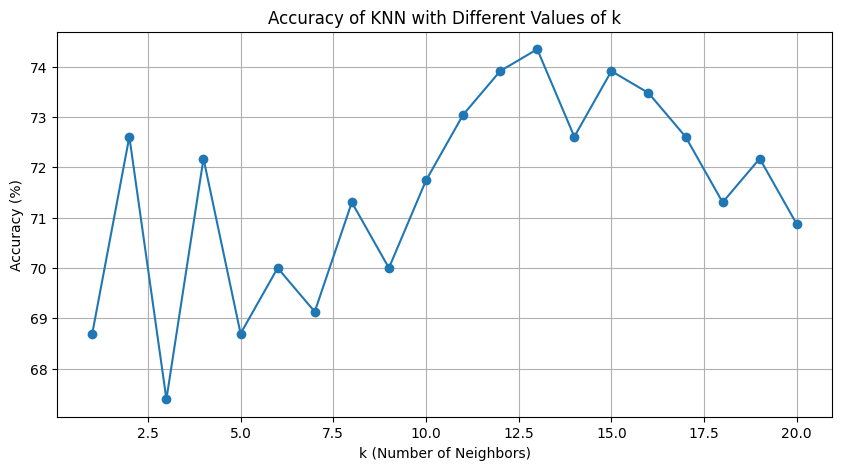

Experiment completed. Check the plot for the accuracy trend.


In [9]:
# Function to test KNN on different values of k and plot the accuracies
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  """
  Run KNN predictions for different values of k and plot the accuracies.
  Arguments:
  X_train : np.ndarray
  The training feature matrix.
  y_train : np.ndarray
  The training labels.
  X_test : np.ndarray
  The test feature matrix.
  y_test : np.ndarray
  The test labels.
  k_values : list of int
  A list of k values to experiment with.
  Returns:
  dict
  A dictionary with k values as keys and their corresponding accuracies as values.
  """
  accuracies = {}
  for k in k_values:
    # Make predictions using the current value of k
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)
    accuracies[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
  # Plot the accuracies
  plt.figure(figsize=(10, 5))
  plt.plot(k_values, list(accuracies.values()), marker='o')
  plt.xlabel('k (Number of Neighbors)')
  plt.ylabel('Accuracy (%)')
  plt.title('Accuracy of KNN with Different Values of k')
  plt.grid(True)
  plt.show()
  return accuracies
# Define the range of k values to experiment with
k_values = range(1, 21) # You can adjust this range as needed
# Run the experiment
try:
  accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
  print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
  print(f"An unexpected error occurred during the experiment: {e}")

Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split on scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3)


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:
  – How scaling impacted the KNN performance.
  
  – The reason for any observed changes in accuracy.

In [13]:
# Predictions and accuracy for scaled data
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)

print(f"Accuracy on Scaled Data (k=3): {accuracy_scaled:.2f}%")

Accuracy on Scaled Data (k=3): 69.13%


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

  – Accuracy.
  
  – Time taken to make predictions.

In [14]:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
accuracies_original = []
accuracies_scaled = []
times_original = []
times_scaled = []

for k in k_values:
    # Measure time and accuracy for original data
    start = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k)
    times_original.append(time.time() - start)
    accuracies_original.append(compute_accuracy(y_test, predictions))

    # Measure time and accuracy for scaled data
    start = time.time()
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k)
    times_scaled.append(time.time() - start)
    accuracies_scaled.append(compute_accuracy(y_test_scaled, predictions_scaled))

2. Visualize the Results:

• Plot the following graphs:

  – k vs. Accuracy for original and scaled datasets.

  – k vs. Time Taken for original and scaled datasets.


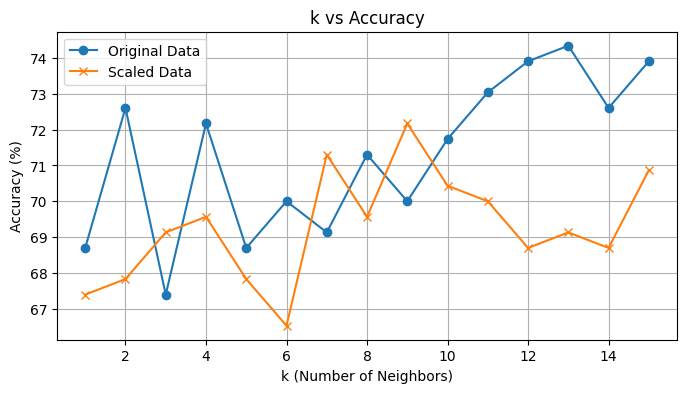

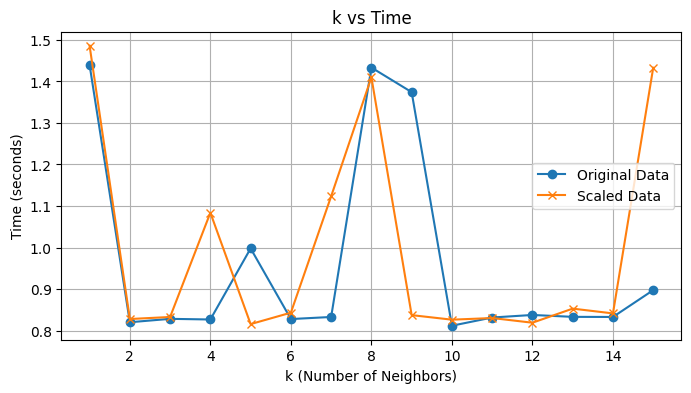

In [15]:
# Plot k vs Accuracy
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_original, label='Original Data', marker='o')
plt.plot(k_values, accuracies_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs Time
plt.figure(figsize=(8, 4))
plt.plot(k_values, times_original, label='Original Data', marker='o')
plt.plot(k_values, times_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.title('k vs Time')
plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:
  • Discuss how the choice of k affects the accuracy and computational cost.

  • Identify the optimal k based on your analysis.

The accuracy and computing cost of the k-Nearest Neighbors (k-NN) method are greatly impacted by the choice of k. The model is highly dependent on the closest neighbors when k is small, such k=1 or k=2, which leaves it vulnerable to noise and data outliers. This frequently results in overfitting even while it enables the model to grasp intricate decision boundaries and local trends. In contrast, the model smoothes decision boundaries and lessens the impact of noise when k is big, such as k=10 or more, by averaging the contribution of numerous neighbors. The model may underfit as a result of this generalization, overlooking significant fine-grained patterns in the data.

Because the method must sort more neighbors to reach the top k, raising k lengthens the prediction time from a computing standpoint. With a smaller k, predictions are made more quickly since fewer neighbors must be assessed. However, sorting a larger subset of distances is necessary for bigger values of k, which raises the computing cost. These trade-offs are balanced by the optimal value of k. Moderate values, such k=5 to k=7, offer the best performance, obtaining excellent accuracy while keeping computation times acceptable, according to empirical studies. Accuracy tends to plateau or marginally decline beyond this range, and computing costs increase.


